In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#reading in dataset 
posts = pd.read_csv('../data/processed/cleaned_reddit_data.csv')

posts.head()

,Unnamed: 0,Unnamed: 0.1,selftext,title,time_created,processed_text
0,0,0,"Hi all, hoping for some advise here. \n\nWe ar...",Changing insurance mid year?,2020-11-20 04:38:11,hi all hoping for some advise here \n\nwe are ...
1,1,1,It's my time picking out insurance and dealing...,PPO or CDHP as a person with a chronic disease?,2020-11-20 04:19:00,it's my time picking out insurance and dealing...
2,2,2,I am wondering about the implications of answe...,How to answer questions about an injury/worker...,2020-11-20 04:08:32,i am wondering about the implications of answe...
3,3,3,I had spoken with someone over the phone with ...,Misinformed by my insurance,2020-11-20 03:07:41,i had spoken with someone over the phone with ...
4,4,4,Can anyone provide me any information about th...,Blue Cross vs Cigna,2020-11-20 01:56:38,can anyone provide me any information about th...


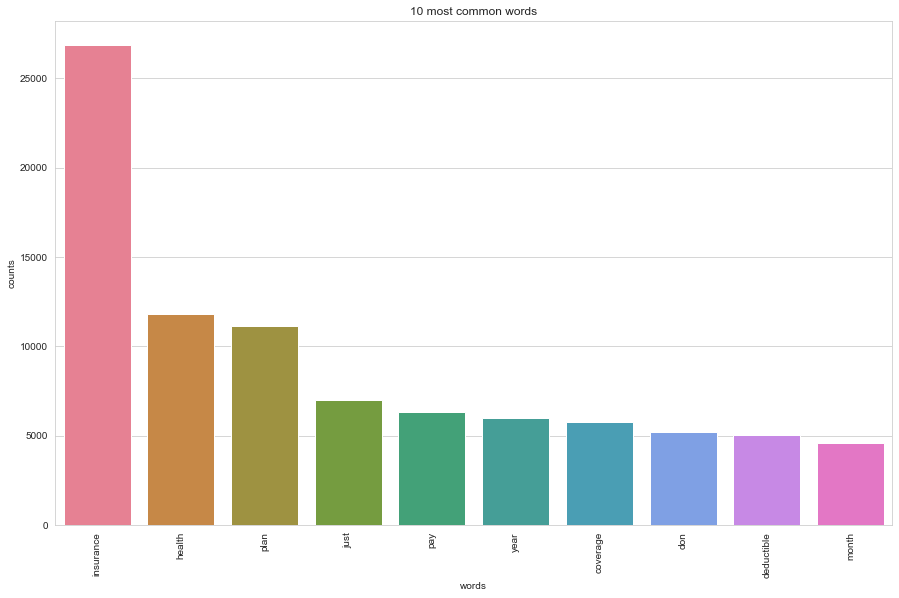

In [3]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [4]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [5]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

topics = [5, 10, 20, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)# Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('/n')

With 5 number of topics
Topics found via LDA:

Topic #0:
insurance health plan coverage job year just month don new

Topic #1:
network doctor insurance provider blue office hospital removed care plan

Topic #2:
deductible plan pay insurance pocket year hsa amp cost max

Topic #3:
insurance health doctor covered surgery company hospital amp know just

Topic #4:
insurance told just said got company called pay received time
/n
With 10 number of topics
Topics found via LDA:

Topic #0:
amp x200b https nbsp imgurcom plans comments wwwredditcom plan auto

Topic #1:
insurance just don need ve know doctor health help pay

Topic #2:
network provider plan hmo pcp bcbs anthem ppo cigna providers

Topic #3:
insurance health like state plans know cover pre does existing

Topic #4:
deductible plan pay pocket insurance year hsa max cost health

Topic #5:
insurance company doctor hospital surgery pay said just covered claim

Topic #6:
insurance health plan job coverage year just month income new

Topic

TypeError: object of type 'NoneType' has no len()